The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Can you predict if the customer is going to honor the reservation or cancel it ?

## Data Dictionary

## Libraries loading

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Read

In [2]:
data=pd.read_csv(r"C:\Users\vivek\Desktop\GGN AUG2022\my_projects_dse\hotel reservation prediction\hotel reservation prediction\Hotel Reservations.csv")

In [3]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
data.shape

(36275, 19)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## Data Cleaning

In [7]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
data.drop('Booking_ID',axis=1,inplace=True)

## Univariate analysis

In [16]:
num_col=data.select_dtypes(include=np.number).columns
cat_col=data.select_dtypes(include=np.object).columns

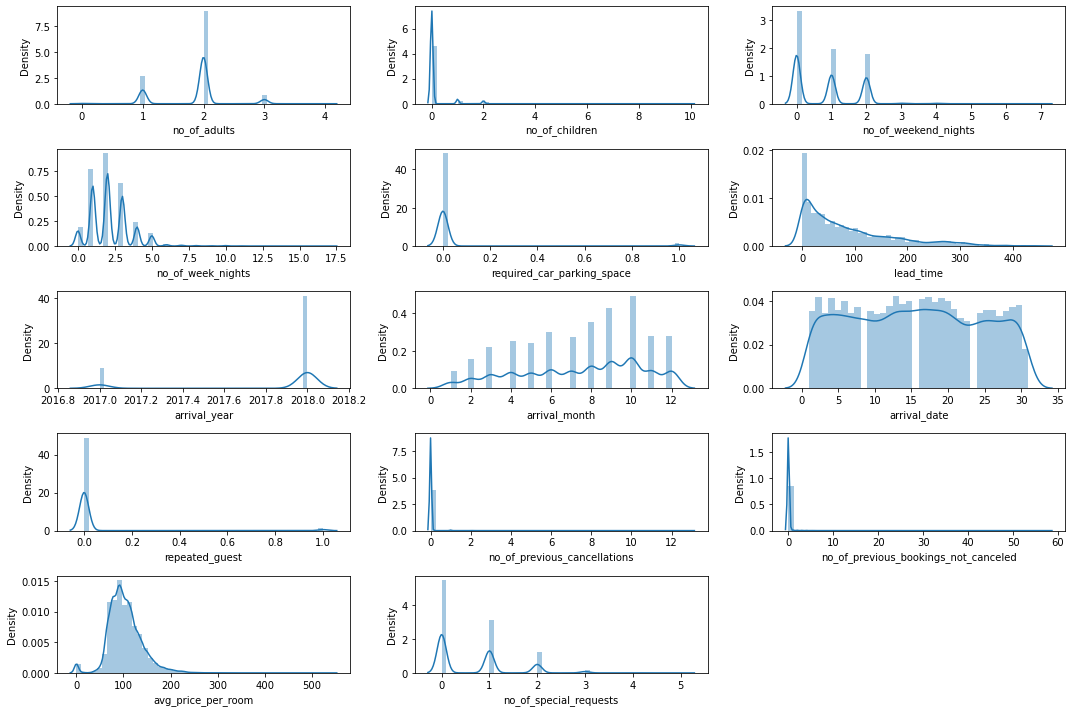

In [19]:
t=1
plt.figure(figsize=(15,10))
for i in num_col:
    plt.subplot(5,3,t)
    sns.distplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

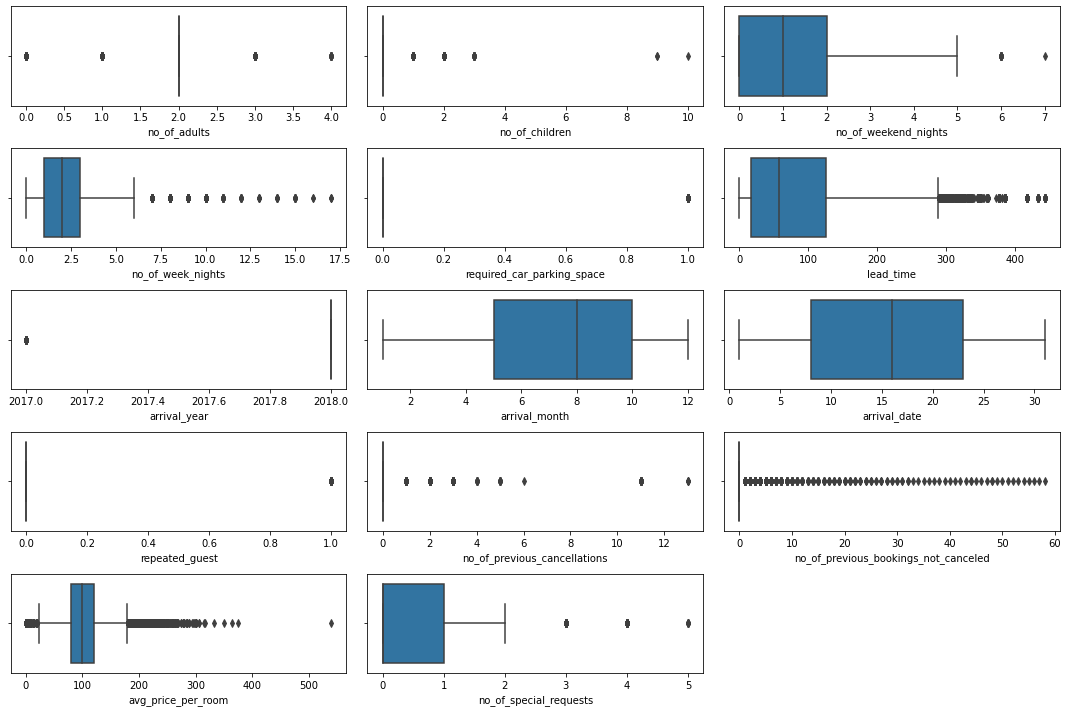

In [23]:
t=1
plt.figure(figsize=(15,10))
for i in num_col:
    plt.subplot(5,3,t)
    sns.boxplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

insights from univariate analysis
* most of the couples book the rooms
* strange anomoly can be seen in columns(no of children)
* strange anomoly can be seen in columns(no of weekend nights) 
* strange anomoly can be seen in column(no_of_week nights)
* more people arrive at end of year
* uniform distribution of arrival date
* small percentage of repeated guest
* majority of prices lie between 50 to 180 euros
* most of customers dont require parking space

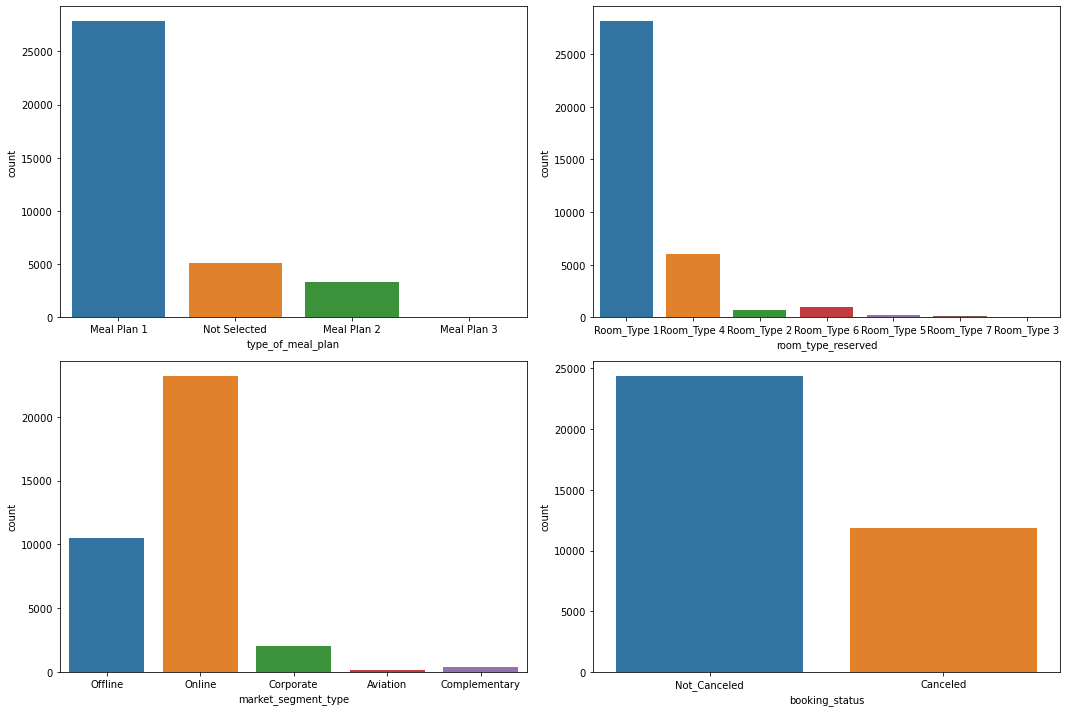

In [30]:
t=1
plt.figure(figsize=(15,10))
for i in cat_col:
    plt.subplot(2,2,t)
    sns.countplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

## Bivariate Anlaysis

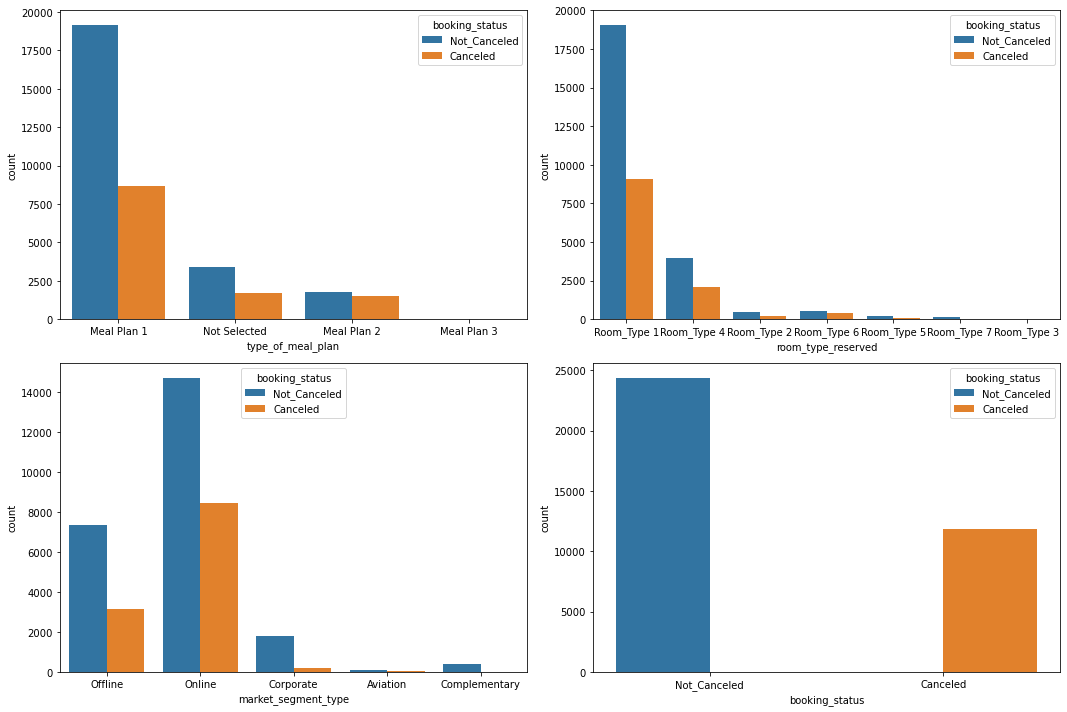

In [35]:
t=1
plt.figure(figsize=(15,10))
for i in cat_col:
    plt.subplot(2,2,t)
    sns.countplot(data[i],hue=data.booking_status)
    t=t+1
plt.tight_layout()
plt.show()

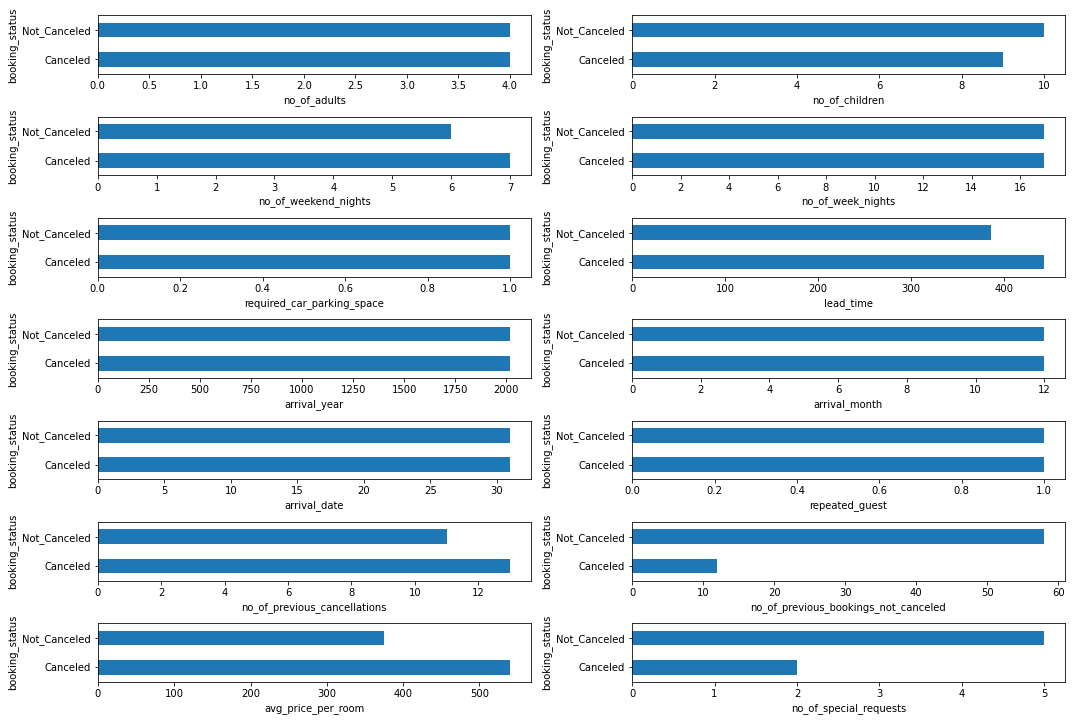

In [67]:
t=1
plt.figure(figsize=(15,10))
for i in num_col:
    plt.subplot(7,2,t)
    data.groupby('booking_status')[i].max().plot(kind='barh')
    plt.xlabel(i)
    t=t+1
plt.tight_layout()
plt.show()


<AxesSubplot:>

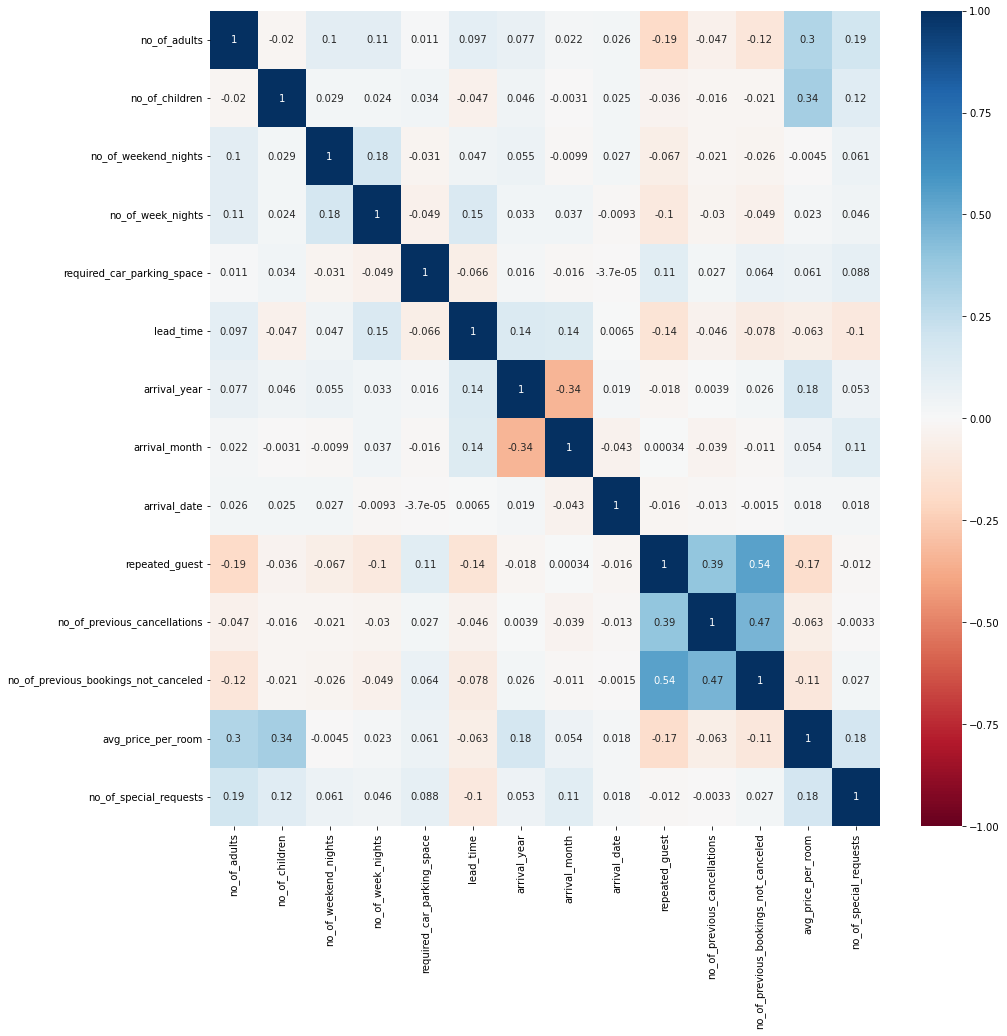

In [71]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)

## Encoding

In [72]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [75]:
for i in cat_col:
    print(data[i].value_counts()/len(data))

Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: type_of_meal_plan, dtype: float64
Room_Type 1    0.775465
Room_Type 4    0.166975
Room_Type 6    0.026630
Room_Type 2    0.019076
Room_Type 5    0.007305
Room_Type 7    0.004356
Room_Type 3    0.000193
Name: room_type_reserved, dtype: float64
Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: market_segment_type, dtype: float64
Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64


In [77]:
target_encoding=data.copy()

In [ ]:
##################################

In [101]:
target_encoding.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
###################################

In [78]:
cat_col=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
for i in cat_col:
    encoding=data[i].value_counts()/len(data)
    data[i]=data[i].map(encoding)

In [86]:
data=pd.get_dummies(data,columns=['booking_status'])

In [88]:
data.drop('booking_status_Not_Canceled',axis=1,inplace=True)

In [117]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_Canceled
0,2,0,1,2,0.767333,0,0.775465,224,2017,10,2,0.290227,0,0,0,65.00,0,0
1,2,0,2,3,0.141420,0,0.775465,5,2018,11,6,0.639945,0,0,0,106.68,1,0
2,1,0,2,1,0.767333,0,0.775465,1,2018,2,28,0.639945,0,0,0,60.00,0,1
3,2,0,0,2,0.767333,0,0.775465,211,2018,5,20,0.639945,0,0,0,100.00,0,1
4,2,0,1,1,0.141420,0,0.775465,48,2018,4,11,0.639945,0,0,0,94.50,0,1


In [118]:
data.arrival_year.value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [120]:
encoding=data.arrival_year.value_counts()/len(data)
data['arrival_year']=data.arrival_year.map(encoding)

In [123]:
encoding=data.arrival_month.value_counts()/len(data)
data.arrival_month=data.arrival_month.map(encoding)

In [127]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_Canceled
0,2,0,1,2,0.767333,0,0.775465,224,0.179573,0.146575,2,0.290227,0,0,0,65.00,0,0
1,2,0,2,3,0.141420,0,0.775465,5,0.820427,0.082150,6,0.639945,0,0,0,106.68,1,0
2,1,0,2,1,0.767333,0,0.775465,1,0.820427,0.046975,28,0.639945,0,0,0,60.00,0,1
3,2,0,0,2,0.767333,0,0.775465,211,0.820427,0.071620,20,0.639945,0,0,0,100.00,0,1
4,2,0,1,1,0.141420,0,0.775465,48,0.820427,0.075424,11,0.639945,0,0,0,94.50,0,1


## Machine learning

### 1) Logistic Regression (Base model)

In [128]:
X=data.drop('booking_status_Canceled',axis=1)
y=data.booking_status_Canceled

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [147]:
import statsmodels.api as sma
model=sma.Logit(ytrain,xtrain).fit()
model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     booking_status_Canceled   No. Observations:                29020
Model:                               Logit   Df Residuals:                    29003
Method:                                MLE   Df Model:                           16
Date:                     Tue, 07 Feb 2023   Pseudo R-squ.:                     inf
Time:                             16:01:26   Log-Likelihood:                   -inf
converged:                            True   LL-Null:                        0.0000
Covariance Type:                 nonrobust   LLR p-value:                     1.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                            -0.5014      0.030    -16.579      0.000      -0.561      -0.442
no_of_children                          -0.1002      0.041     -2.426      0.015      -0.181      -0.019
no_of_weekend_nights                     0.0866      0.018      4.915      0.000       0.052       0.121
no_of_week_nights                       -0.0328      0.011     -3.038      0.002      -0.054      -0.012
type_of_meal_plan                       -1.0763      0.053    -20.475      0.000      -1.179      -0.973
required_car_parking_space              -1.3187      0.125    -10.586      0.000      -1.563      -1.075
room_type_reserved                      -1.3949      0.053    -26.326      0.000      -1.499      -1.291
lead_time                                0.0136      0.000     61.704      0.000       0.013       0.014
arrival_year                            -0.0616      0.071     -0.870      0.384      -0.200       0.077
arrival_month                           -8.6061      0.547    -15.747      0.000      -9.677      -7.535
arrival_date                            -0.0117      0.002     -6.946      0.000      -0.015      -0.008
market_segment_type                      2.6750      0.098     27.196      0.000       2.482       2.868
repeated_guest                          -2.3377      0.484     -4.828      0.000      -3.287      -1.389
no_of_previous_cancellations             0.1632      0.069      2.368      0.018       0.028       0.298
no_of_previous_bookings_not_canceled    -0.0552      0.078     -0.705      0.481      -0.209       0.098
avg_price_per_room                       0.0085      0.001     14.775      0.000       0.007       0.010
no_of_special_requests                  -1.2383      0.026    -47.834      0.000      -1.289      -1.188
========================================================================================================
"""

In [151]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
def evaluation(actual,pred):
    print('confusion matrix \n', confusion_matrix(actual,pred))
    print()
    print('classification report \n',classification_report(actual,pred))
def roc(actual,pred_prob):
    fpr,tpr,thres=roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

In [142]:
from sklearn.linear_model import LogisticRegression

confusion matrix 
 [[4314  503]
 [1088 1350]]

classification report 
               precision    recall  f1-score   support

           0       0.80      0.90      0.84      4817
           1       0.73      0.55      0.63      2438

    accuracy                           0.78      7255
   macro avg       0.76      0.72      0.74      7255
weighted avg       0.78      0.78      0.77      7255



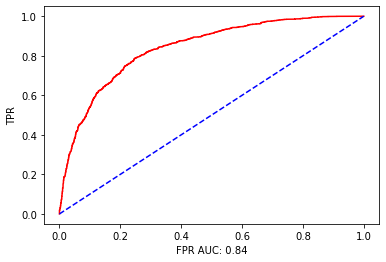

In [154]:
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

confusion matrix 
 [[4332  485]
 [1046 1392]]

classification report 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      4817
           1       0.74      0.57      0.65      2438

    accuracy                           0.79      7255
   macro avg       0.77      0.74      0.75      7255
weighted avg       0.78      0.79      0.78      7255



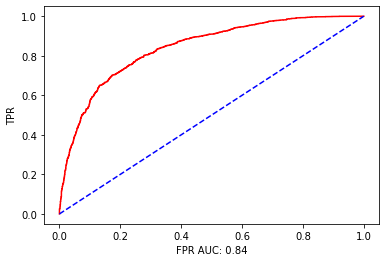

In [156]:
## improving the base model by removing non significant feature 
xtrain_updated=xtrain.drop(['arrival_year','no_of_previous_bookings_not_canceled'],axis=1)
xtest_updated=xtest.drop(['arrival_year','no_of_previous_bookings_not_canceled'],axis=1)
lr=LogisticRegression()
model=lr.fit(xtrain_updated,ytrain)
pred=model.predict(xtest_updated)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest_updated)[:,1])

In [ ]:
#slight improvement can be seen in recall, f1-score

## 2) Decision Tree 

confusion matrix 
 [[4302  515]
 [ 447 1991]]

classification report 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4817
           1       0.79      0.82      0.81      2438

    accuracy                           0.87      7255
   macro avg       0.85      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255



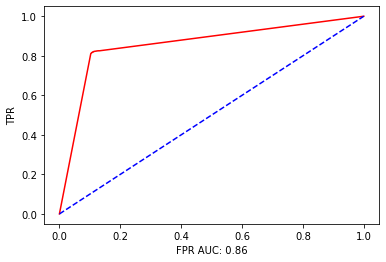

In [157]:
from sklearn.tree import DecisionTreeClassifier
lr=DecisionTreeClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

## 3) K Nearest Neighbour

confusion matrix 
 [[4317  500]
 [ 911 1527]]

classification report 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      4817
           1       0.75      0.63      0.68      2438

    accuracy                           0.81      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.81      0.80      7255



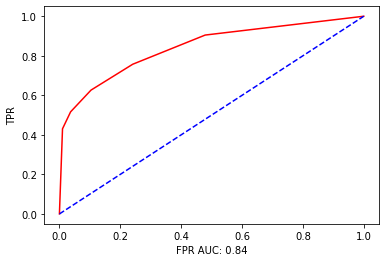

In [159]:
from sklearn.neighbors import KNeighborsClassifier
lr=KNeighborsClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

 ## 4) Naive Bayes

confusion matrix 
 [[ 871 3946]
 [  53 2385]]

classification report 
               precision    recall  f1-score   support

           0       0.94      0.18      0.30      4817
           1       0.38      0.98      0.54      2438

    accuracy                           0.45      7255
   macro avg       0.66      0.58      0.42      7255
weighted avg       0.75      0.45      0.38      7255



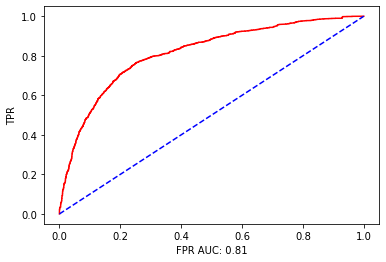

In [160]:
from sklearn.naive_bayes import GaussianNB
lr=GaussianNB()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

## 5) Random Forest

confusion matrix 
 [[4554  263]
 [ 440 1998]]

classification report 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      4817
           1       0.88      0.82      0.85      2438

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



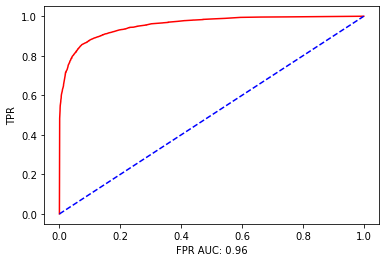

In [161]:
from sklearn.ensemble import RandomForestClassifier
lr=RandomForestClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

## 6) Adaboost

confusion matrix 
 [[4304  513]
 [ 790 1648]]

classification report 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      4817
           1       0.76      0.68      0.72      2438

    accuracy                           0.82      7255
   macro avg       0.80      0.78      0.79      7255
weighted avg       0.82      0.82      0.82      7255



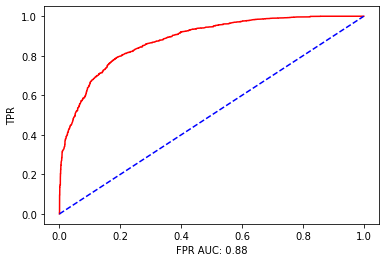

In [162]:
from sklearn.ensemble import AdaBoostClassifier
lr=AdaBoostClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

## 6) XGboost

In [163]:
from xgboost import XGBClassifier

confusion matrix 
 [[4494  323]
 [ 475 1963]]

classification report 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      4817
           1       0.86      0.81      0.83      2438

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



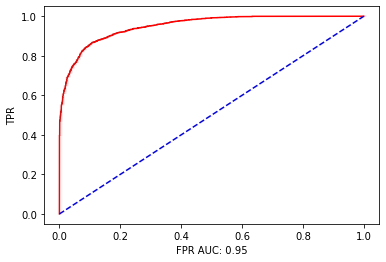

In [164]:
lr=XGBClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

## Catboost

Learning rate set to 0.043402
0:	learn: 0.6622724	total: 201ms	remaining: 3m 21s
1:	learn: 0.6351571	total: 234ms	remaining: 1m 56s
2:	learn: 0.6132463	total: 250ms	remaining: 1m 23s
3:	learn: 0.5930450	total: 262ms	remaining: 1m 5s
4:	learn: 0.5729593	total: 272ms	remaining: 54.1s
5:	learn: 0.5550919	total: 281ms	remaining: 46.6s
6:	learn: 0.5395101	total: 290ms	remaining: 41.2s
7:	learn: 0.5265717	total: 300ms	remaining: 37.2s
8:	learn: 0.5140369	total: 310ms	remaining: 34.1s
9:	learn: 0.5020624	total: 319ms	remaining: 31.6s
10:	learn: 0.4923344	total: 329ms	remaining: 29.5s
11:	learn: 0.4830330	total: 338ms	remaining: 27.8s
12:	learn: 0.4748116	total: 347ms	remaining: 26.3s
13:	learn: 0.4668484	total: 356ms	remaining: 25.1s
14:	learn: 0.4594411	total: 366ms	remaining: 24s
15:	learn: 0.4531524	total: 375ms	remaining: 23.1s
16:	learn: 0.4462909	total: 387ms	remaining: 22.4s
17:	learn: 0.4410177	total: 404ms	remaining: 22s
18:	learn: 0.4363053	total: 418ms	remaining: 21.6s
19:	learn: 0

172:	learn: 0.3136371	total: 2.34s	remaining: 11.2s
173:	learn: 0.3133946	total: 2.35s	remaining: 11.2s
174:	learn: 0.3131551	total: 2.38s	remaining: 11.2s
175:	learn: 0.3128217	total: 2.39s	remaining: 11.2s
176:	learn: 0.3126130	total: 2.41s	remaining: 11.2s
177:	learn: 0.3124236	total: 2.42s	remaining: 11.2s
178:	learn: 0.3117559	total: 2.44s	remaining: 11.2s
179:	learn: 0.3109236	total: 2.45s	remaining: 11.2s
180:	learn: 0.3105890	total: 2.46s	remaining: 11.1s
181:	learn: 0.3104033	total: 2.47s	remaining: 11.1s
182:	learn: 0.3101434	total: 2.49s	remaining: 11.1s
183:	learn: 0.3100431	total: 2.5s	remaining: 11.1s
184:	learn: 0.3097503	total: 2.52s	remaining: 11.1s
185:	learn: 0.3094757	total: 2.53s	remaining: 11.1s
186:	learn: 0.3092245	total: 2.56s	remaining: 11.1s
187:	learn: 0.3090934	total: 2.58s	remaining: 11.2s
188:	learn: 0.3088880	total: 2.61s	remaining: 11.2s
189:	learn: 0.3086961	total: 2.62s	remaining: 11.2s
190:	learn: 0.3086355	total: 2.64s	remaining: 11.2s
191:	learn: 0

341:	learn: 0.2793707	total: 5.54s	remaining: 10.7s
342:	learn: 0.2792616	total: 5.56s	remaining: 10.7s
343:	learn: 0.2791097	total: 5.57s	remaining: 10.6s
344:	learn: 0.2788529	total: 5.58s	remaining: 10.6s
345:	learn: 0.2787546	total: 5.59s	remaining: 10.6s
346:	learn: 0.2786584	total: 5.6s	remaining: 10.5s
347:	learn: 0.2781364	total: 5.61s	remaining: 10.5s
348:	learn: 0.2779515	total: 5.62s	remaining: 10.5s
349:	learn: 0.2778131	total: 5.63s	remaining: 10.5s
350:	learn: 0.2778103	total: 5.63s	remaining: 10.4s
351:	learn: 0.2776256	total: 5.64s	remaining: 10.4s
352:	learn: 0.2774523	total: 5.65s	remaining: 10.4s
353:	learn: 0.2772725	total: 5.66s	remaining: 10.3s
354:	learn: 0.2771207	total: 5.67s	remaining: 10.3s
355:	learn: 0.2769804	total: 5.68s	remaining: 10.3s
356:	learn: 0.2768748	total: 5.69s	remaining: 10.2s
357:	learn: 0.2764598	total: 5.7s	remaining: 10.2s
358:	learn: 0.2762608	total: 5.71s	remaining: 10.2s
359:	learn: 0.2761149	total: 5.72s	remaining: 10.2s
360:	learn: 0.

516:	learn: 0.2559206	total: 7.24s	remaining: 6.76s
517:	learn: 0.2558126	total: 7.25s	remaining: 6.75s
518:	learn: 0.2557401	total: 7.26s	remaining: 6.73s
519:	learn: 0.2556608	total: 7.27s	remaining: 6.71s
520:	learn: 0.2555459	total: 7.28s	remaining: 6.69s
521:	learn: 0.2554069	total: 7.29s	remaining: 6.67s
522:	learn: 0.2553063	total: 7.3s	remaining: 6.65s
523:	learn: 0.2551917	total: 7.3s	remaining: 6.63s
524:	learn: 0.2549944	total: 7.31s	remaining: 6.62s
525:	learn: 0.2549853	total: 7.32s	remaining: 6.6s
526:	learn: 0.2549038	total: 7.33s	remaining: 6.58s
527:	learn: 0.2547766	total: 7.34s	remaining: 6.56s
528:	learn: 0.2547059	total: 7.35s	remaining: 6.54s
529:	learn: 0.2546002	total: 7.36s	remaining: 6.53s
530:	learn: 0.2545014	total: 7.37s	remaining: 6.51s
531:	learn: 0.2544100	total: 7.38s	remaining: 6.49s
532:	learn: 0.2543356	total: 7.38s	remaining: 6.47s
533:	learn: 0.2542680	total: 7.39s	remaining: 6.45s
534:	learn: 0.2541242	total: 7.4s	remaining: 6.43s
535:	learn: 0.25

681:	learn: 0.2408588	total: 8.77s	remaining: 4.09s
682:	learn: 0.2407669	total: 8.78s	remaining: 4.08s
683:	learn: 0.2406895	total: 8.79s	remaining: 4.06s
684:	learn: 0.2406044	total: 8.8s	remaining: 4.05s
685:	learn: 0.2405419	total: 8.81s	remaining: 4.03s
686:	learn: 0.2404706	total: 8.82s	remaining: 4.02s
687:	learn: 0.2403787	total: 8.83s	remaining: 4s
688:	learn: 0.2403081	total: 8.84s	remaining: 3.99s
689:	learn: 0.2402454	total: 8.85s	remaining: 3.97s
690:	learn: 0.2401074	total: 8.86s	remaining: 3.96s
691:	learn: 0.2400078	total: 8.86s	remaining: 3.94s
692:	learn: 0.2399431	total: 8.87s	remaining: 3.93s
693:	learn: 0.2399375	total: 8.88s	remaining: 3.92s
694:	learn: 0.2398880	total: 8.89s	remaining: 3.9s
695:	learn: 0.2398311	total: 8.9s	remaining: 3.89s
696:	learn: 0.2397703	total: 8.91s	remaining: 3.87s
697:	learn: 0.2396870	total: 8.92s	remaining: 3.86s
698:	learn: 0.2396007	total: 8.93s	remaining: 3.84s
699:	learn: 0.2395292	total: 8.93s	remaining: 3.83s
700:	learn: 0.2394

852:	learn: 0.2288743	total: 10.3s	remaining: 1.78s
853:	learn: 0.2287959	total: 10.3s	remaining: 1.77s
854:	learn: 0.2287439	total: 10.4s	remaining: 1.75s
855:	learn: 0.2287100	total: 10.4s	remaining: 1.74s
856:	learn: 0.2286681	total: 10.4s	remaining: 1.73s
857:	learn: 0.2285936	total: 10.4s	remaining: 1.72s
858:	learn: 0.2285621	total: 10.4s	remaining: 1.7s
859:	learn: 0.2284893	total: 10.4s	remaining: 1.69s
860:	learn: 0.2284228	total: 10.4s	remaining: 1.68s
861:	learn: 0.2283887	total: 10.4s	remaining: 1.67s
862:	learn: 0.2283391	total: 10.4s	remaining: 1.65s
863:	learn: 0.2283094	total: 10.4s	remaining: 1.64s
864:	learn: 0.2282860	total: 10.4s	remaining: 1.63s
865:	learn: 0.2282477	total: 10.4s	remaining: 1.61s
866:	learn: 0.2282143	total: 10.5s	remaining: 1.6s
867:	learn: 0.2281145	total: 10.5s	remaining: 1.59s
868:	learn: 0.2280007	total: 10.5s	remaining: 1.58s
869:	learn: 0.2279632	total: 10.5s	remaining: 1.56s
870:	learn: 0.2278966	total: 10.5s	remaining: 1.55s
871:	learn: 0.

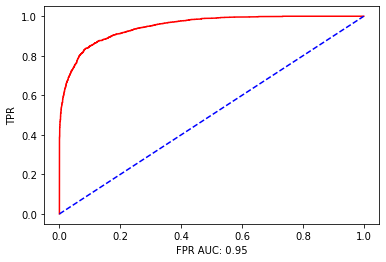

In [165]:
from catboost import CatBoostClassifier
lr=CatBoostClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

## Conclusion

hence above all the model random forest works fine. 